# Project: Investigate a Dataset - [Dataset-name]


In [79]:
!pip install squarify

In [80]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify as sq
import seaborn as sns
%matplotlib inline

## Questions

#### 1- is there a relation between the type of movie and its rate?
#### 2- How much money was spent on movies production?
#### 3- Is popularity affected by the year the movie was released?
#### 4- are viewers satisfaied with the films produced?

<a id='wrangling'></a>
## Data Wrangling

In [81]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv("movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [82]:
df.shape

(10866, 21)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


## Data Cleaning 

#### Columns names that have a NAN values 

In [84]:
df.columns[df.isna().any()].tolist()

['imdb_id',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'genres',
 'production_companies']

In [85]:
pd.isnull(df).sum() > 0

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

### Removing all rows and columns which have NaN values

In [86]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#
df = df.dropna()
df.dropna()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [87]:
pd.isnull(df).sum() > 0

id                      False
imdb_id                 False
popularity              False
budget                  False
revenue                 False
original_title          False
cast                    False
homepage                False
director                False
tagline                 False
keywords                False
overview                False
runtime                 False
genres                  False
production_companies    False
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [88]:
df.shape

(1992, 21)

In [89]:
# Check if there is dublicated rows or not

df.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
19       False
20       False
22       False
23       False
24       False
25       False
27       False
28       False
29       False
30       False
31       False
34       False
         ...  
9992     False
10012    False
10078    False
10094    False
10131    False
10190    False
10213    False
10222    False
10223    False
10224    False
10238    False
10251    False
10255    False
10317    False
10328    False
10338    False
10372    False
10401    False
10438    False
10489    False
10567    False
10594    False
10595    False
10657    False
10689    False
10724    False
10759    False
10760    False
10817    False
10819    False
Length: 1992, dtype: bool

### Replacing the incorrect data type  

In [90]:
# Replace the data tupe of 'release_date' from str into datetime

df['release_date'] = pd.to_datetime(df['release_date'])

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
id                      1992 non-null int64
imdb_id                 1992 non-null object
popularity              1992 non-null float64
budget                  1992 non-null int64
revenue                 1992 non-null int64
original_title          1992 non-null object
cast                    1992 non-null object
homepage                1992 non-null object
director                1992 non-null object
tagline                 1992 non-null object
keywords                1992 non-null object
overview                1992 non-null object
runtime                 1992 non-null int64
genres                  1992 non-null object
production_companies    1992 non-null object
release_date            1992 non-null datetime64[ns]
vote_count              1992 non-null int64
vote_average            1992 non-null float64
release_year            1992 non-null int64
budget_adj              1992 non-

# <a id='eda'></a>
## Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2bc6b6550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe2b8a2e470>]], dtype=object)

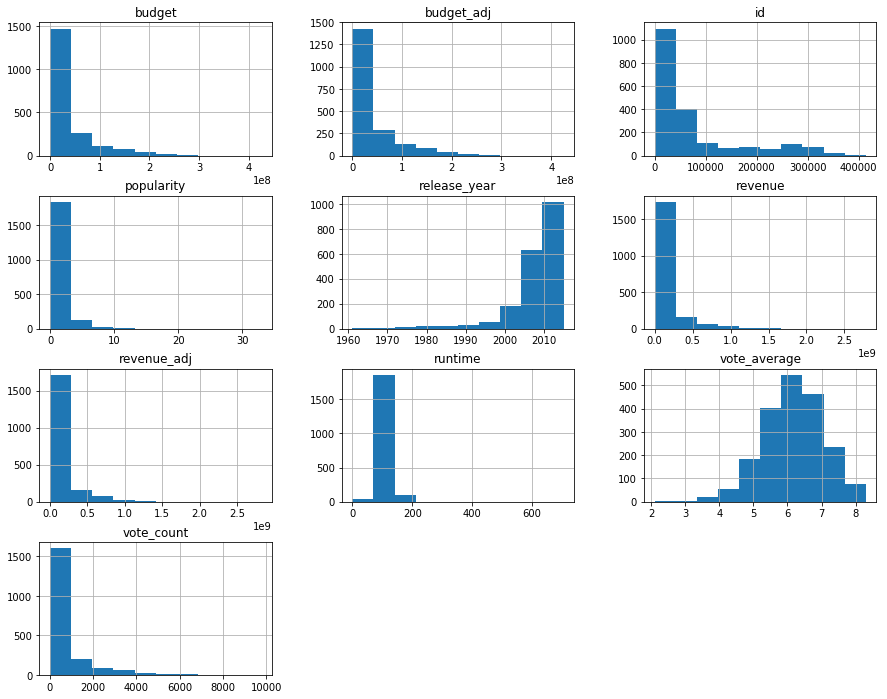

In [92]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(15,12))

### descriptive statistics for each column of data

In [93]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1992.000000,1992.000000,1.992000e+03,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.000000,1.992000e+03,1.992000e+03
mean,71652.152108,1.316763,3.454924e+07,1.152153e+08,106.040161,643.616968,6.178614,2007.796687,3.627376e+07,1.302391e+08
std,92355.883915,1.873563,5.061878e+07,2.202887e+08,29.234592,1092.355998,0.881955,7.549224,5.129783e+07,2.564338e+08
min,11.000000,0.000620,0.000000e+00,0.000000e+00,0.000000,10.000000,2.100000,1961.000000,0.000000e+00,0.000000e+00
25%,9699.000000,0.384079,0.000000e+00,0.000000e+00,92.000000,51.000000,5.600000,2006.000000,0.000000e+00,0.000000e+00
50%,35112.500000,0.774223,1.500000e+07,2.578782e+07,102.000000,210.000000,6.200000,2010.000000,1.524601e+07,2.806370e+07
75%,83573.000000,1.538639,4.800000e+07,1.278787e+08,116.000000,688.250000,6.800000,2012.000000,5.064450e+07,1.393645e+08
max,414419.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


## Relation between the popularity & Release year

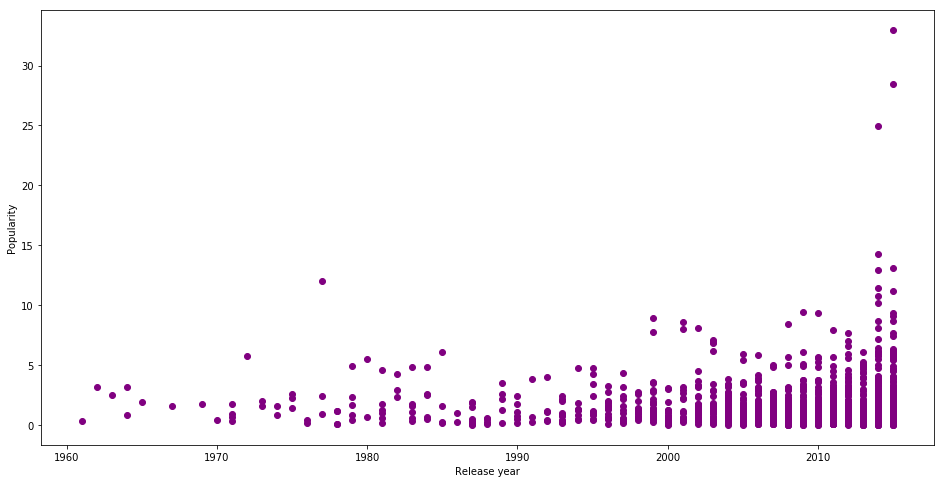

In [94]:
p = list(df['popularity'])
r_d = list(df['release_year'])
plt.figure(figsize=[16,8])
plt.scatter(r_d,p, color = 'purple')
plt.xlabel('Release year')
plt.ylabel('Popularity')
plt.show()

### Count how many movies was published for every type and draw bar plot to determine which is the most and which is the least.

In [95]:
movie_genre = ['Action','Comedy','Music','Crime','Family', 'Drama', 'Romance', 'Adventure', 'History', 'Horror', 'thriller','War', 'Mestry', 'Fantasy', 'Science Fiction', 'Animation', 'Documentry']
type_count = dict()
for m in movie_genre:
    for k in list(df['genres']):
        if m in k:
            type_count[m] = type_count.get(m, 0) + 1
print(type_count)

{'Action': 532, 'Comedy': 640, 'Music': 72, 'Crime': 262, 'Family': 233, 'Drama': 838, 'Romance': 291, 'Adventure': 361, 'History': 56, 'Horror': 273, 'War': 44, 'Fantasy': 202, 'Science Fiction': 291, 'Animation': 170}


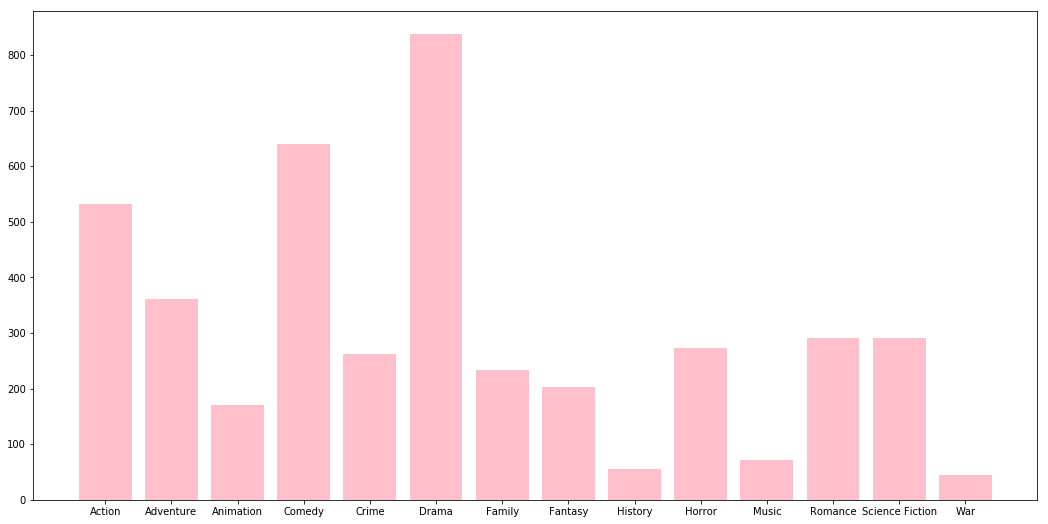

In [96]:
plt.figure(figsize=[18,9])
plt.bar(type_count.keys(),type_count.values(), color = 'pink')
plt.show()

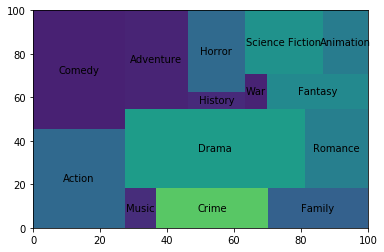

In [97]:
sq.plot(type_count.values(),label=type_count.keys())
plt.figure(figsize=[20,15])
plt.show()

## Relation between Year of release and number of movies published at this year to find which year that most number of movies published during it.

In [98]:
years_counter = dict()
for y in df['release_year']:
    years_counter[y] = years_counter.get(y,0) + 1

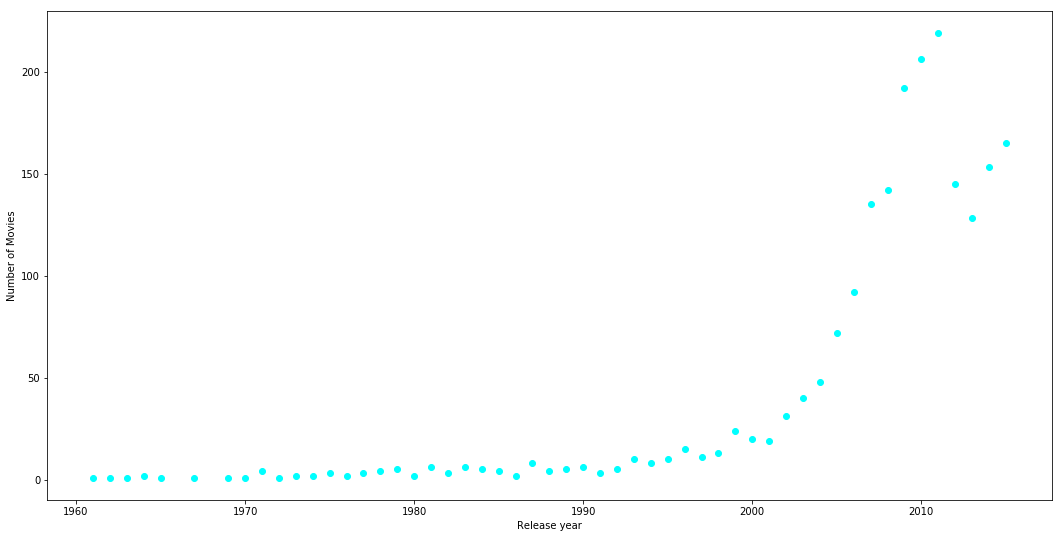

In [99]:
x = years_counter.keys()
y = years_counter.values()
plt.figure(figsize=[18,9])
plt.scatter(x, y, color='cyan')
plt.xlabel('Release year')
plt.ylabel('Number of Movies')
plt.show()

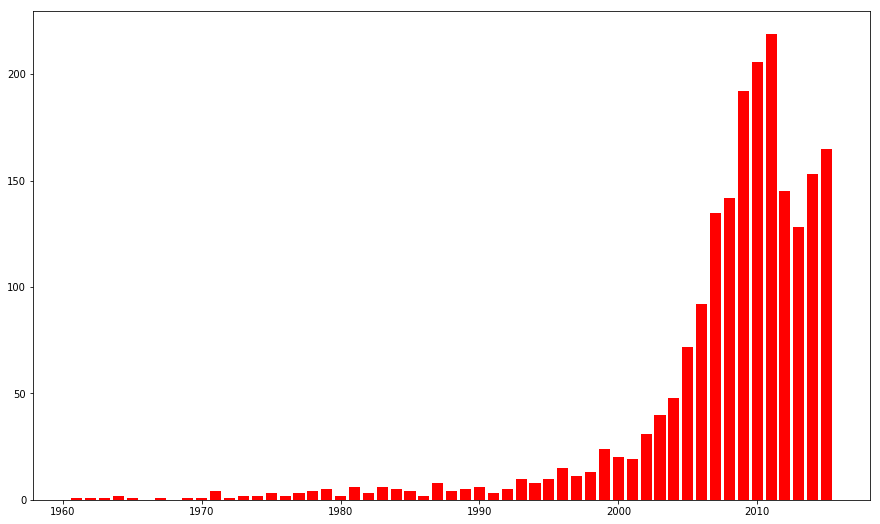

In [100]:
plt.figure(figsize=[15,9])
plt.bar(x,y, color = 'red')
plt.show()

### Clarify the huge amount of money spent each year on the production of these films and how the budget increases each year than before

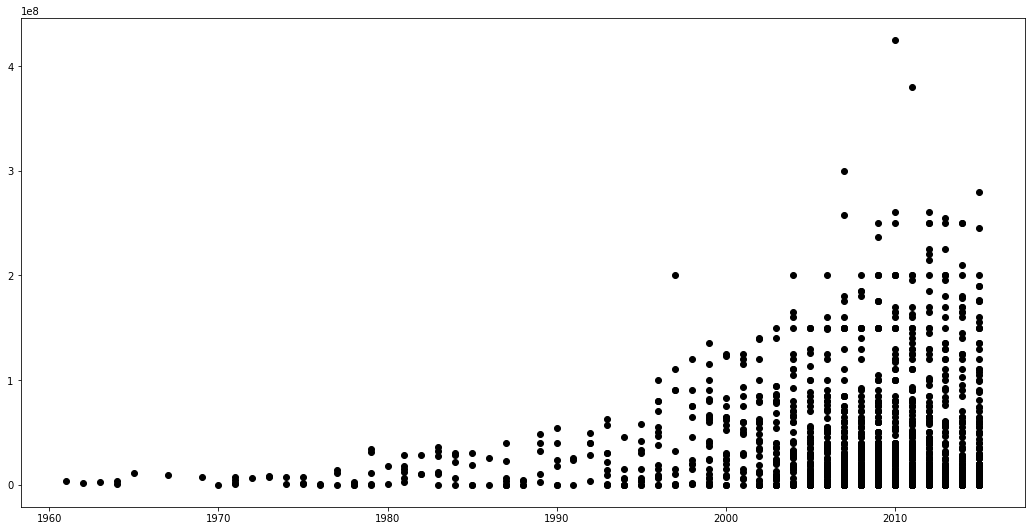

In [101]:
plt.figure(figsize=[18,9])
plt.scatter(list(df['release_year']),list(df['budget']), color='black')
plt.show()

### An explanation of the viewers' satisfaction with the films produced during that period [1966 - 2015].

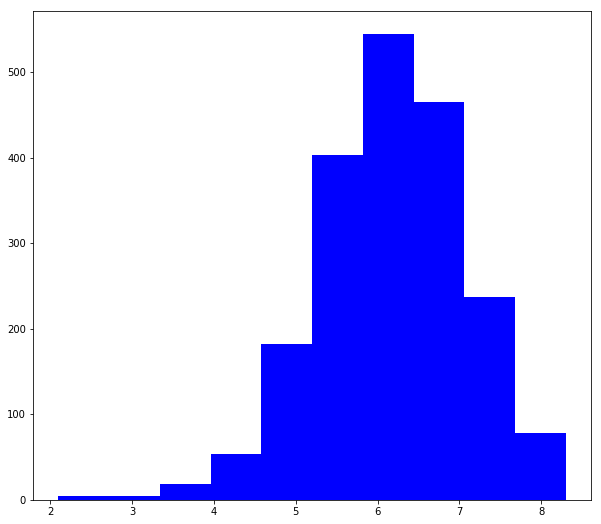

In [102]:
y = list(df['vote_average'])
plt.figure(figsize=[10,9])
plt.hist(y, color='blue')
plt.show()

# Limitations

#### Problem : The data is not cleaned because it had a null values and  wrong data types.

#### Solution : I solved that problem by using built-in functions in pandas module



# Conculsions
#### 1- Every year the number of produced movies increases significantly.
#### 2- Between [1966 - 2015] 10867 movies was produced.
#### 3- The popularity of the movies increases over the years 
#### 4- The most popularity movie in this interval was 'Jurassic World' with popularity '32.985763'.
#### 5- The best movie was 'The Story of Film: An Odyssey' with vote average '9.2'.
#### 6- Drama movies is the most type produced in [1966 - 2015].
#### 7- War movies is the least type produced in [1966 - 2015].
#### 8- Huge money are spent every year for producing these movies and the budget still increases.

In [103]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0